# Simple 2 Moving Average Model

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date, timedelta
from sharpe import gen_sharpe
from fin_table_obj import Table
from ma_cross_obj import MovingAverageTable

Downloading Data:

In [2]:
# YYYY-MM-DD
start = "2014-04-25"

# for current day: str(date.today() - timedelta(1))
end = str(date.today() - timedelta(1))

# moving Averages, MA1 is always smaller than MA2
ma1 = "9"
ma2 = "21"

# model trading days input for crossover visualization in days. standard 1Y is 252 days. Can use multiples of 252 to track years
model_days = 252 * 1

#multi_level_index = False | removes ticker noise in table
QQQ = (yf.download("QQQ", start, end, multi_level_index = False))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


# Complete Table Creation

In [3]:
#QQQ_table = Table(QQQ)
#QQQ_table.gen_table()

In [4]:
QQQ_ma_table = MovingAverageTable(QQQ, ma1, ma2)
QQQ_ma_table.gen_table()

,Day Count,Open,High,Low,Close,9-day MA,21-day MA,Return,Cumulative Return,Model Return,Cumulative Model Return,Signal,Entry
Date,,,,,,,,,,,,,
2014-05-28,23,83.327,83.447,83.034,83.098,81.212,80.486,NaN,NaN,-0.308,-0.308,1,0.0
2014-05-29,24,83.392,83.639,83.227,83.630,81.507,80.672,0.638,0.640,0.637,0.330,1,0.0
2014-05-30,25,83.648,83.767,83.199,83.639,81.930,80.852,0.011,0.651,0.011,0.341,1,0.0
2014-06-02,26,83.740,83.758,83.025,83.556,82.296,81.023,-0.099,0.551,-0.099,0.241,1,0.0
2014-06-03,27,83.282,83.657,83.172,83.520,82.592,81.179,-0.043,0.508,-0.044,0.197,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-21,2764,438.230,439.080,427.930,433.110,445.564,460.900,-2.506,421.204,2.506,12.118,-1,0.0
2025-04-22,2765,438.820,447.580,437.620,444.480,446.611,458.737,2.591,434.887,-2.591,9.250,-1,0.0
2025-04-23,2766,458.170,463.380,452.880,454.560,449.769,457.040,2.242,447.017,-2.242,6.828,-1,0.0


# MA Cross-Over Grid Visualization

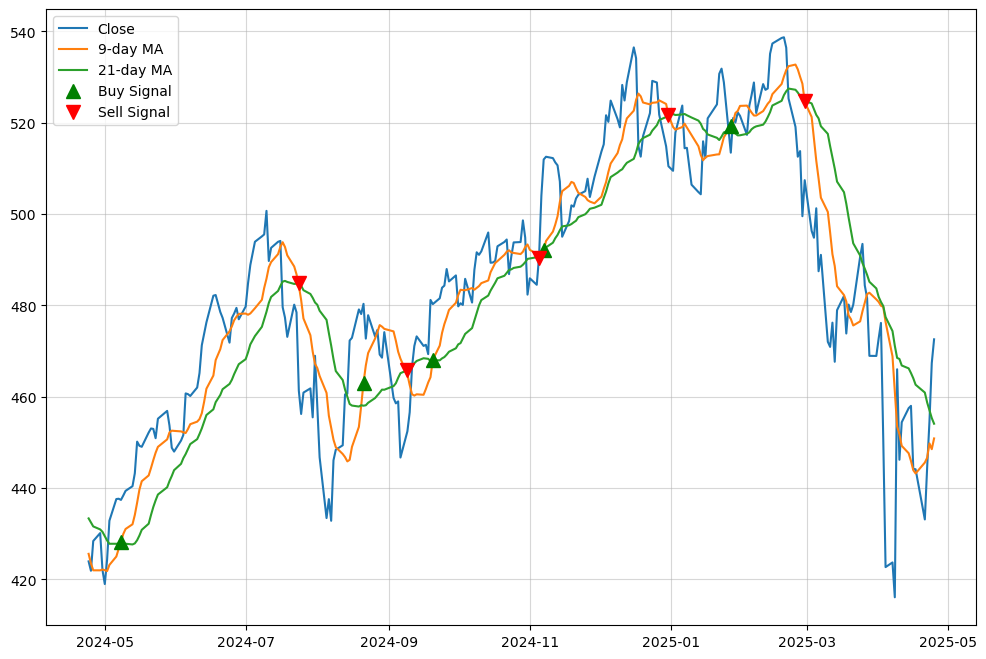

In [5]:
QQQ_ma_table.gen_ma_cross_visual(model_days)

# Buy/Hold to SMA Returns Comparison

Cumulative Buy/Hold Return: 468.68
Cumulative Model Return: 2.76


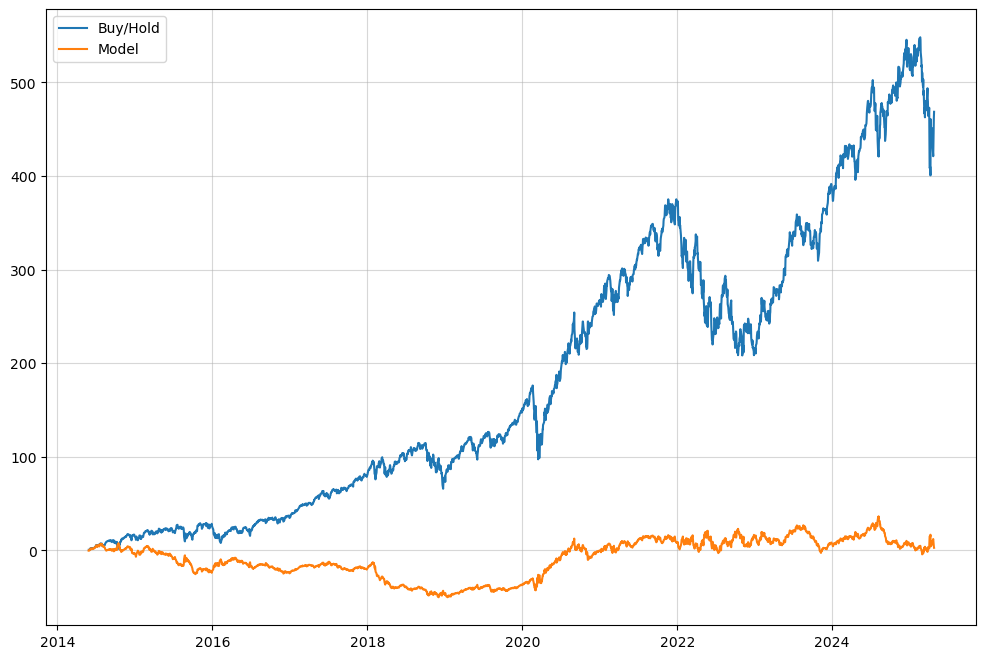

In [6]:
QQQ_ma_table.gen_buyhold_comp()

# Sharpe Ratio:

In [7]:
print('Buy/Hold Sharpe Ratio:', round(gen_sharpe(QQQ_ma_table.gen_table()['Return']), 2))
print('Model Sharpe Ratio:', round(gen_sharpe(QQQ_ma_table.gen_table()['Model Return']), 2))

Buy/Hold Sharpe Ratio: 0.71
Model Sharpe Ratio: -0.01


# Volatility

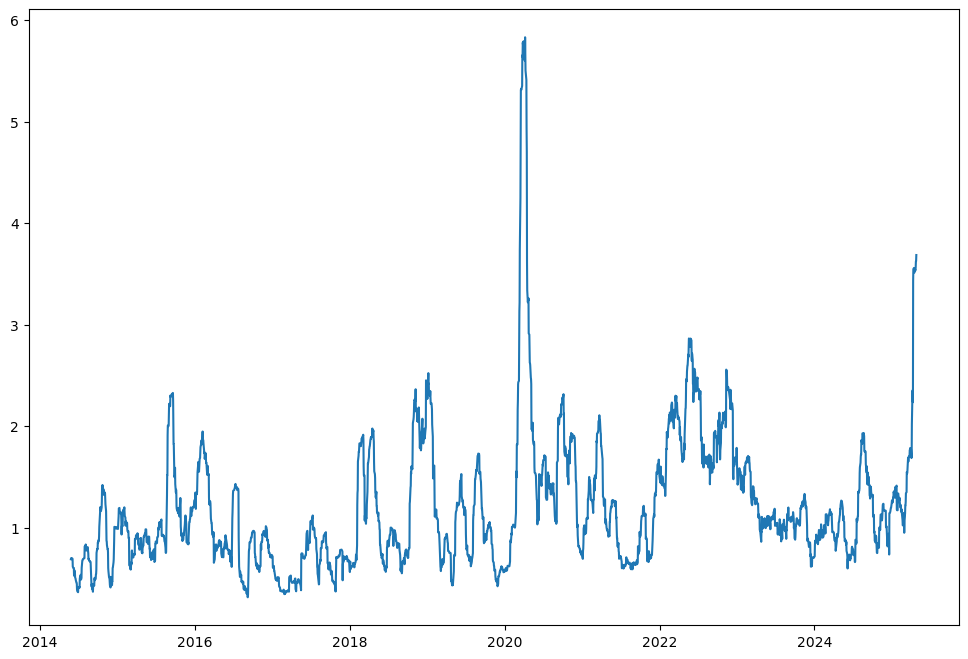

In [8]:
plt.plot(QQQ.Volatility);